Classification: Income Evaluation Dataset
    
Reference: https://www.kaggle.com/datasets/lodetomasi1995/income-classification

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('/Users/gauravsharma/Documents/python/Dataset/income_evaluation.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.info

<bound method DataFrame.info of        age          workclass   fnlwgt    education   education-num  \
0       39          State-gov    77516    Bachelors              13   
1       50   Self-emp-not-inc    83311    Bachelors              13   
2       38            Private   215646      HS-grad               9   
3       53            Private   234721         11th               7   
4       28            Private   338409    Bachelors              13   
...    ...                ...      ...          ...             ...   
32556   27            Private   257302   Assoc-acdm              12   
32557   40            Private   154374      HS-grad               9   
32558   58            Private   151910      HS-grad               9   
32559   22            Private   201490      HS-grad               9   
32560   52       Self-emp-inc   287927      HS-grad               9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-cle

In [8]:
df.shape

(32561, 15)

In [9]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [10]:
df.nunique()

age                   73
 workclass             9
 fnlwgt            21648
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        119
 capital-loss         92
 hours-per-week       94
 native-country       42
 income                2
dtype: int64

In [11]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [12]:
data_corr = df.corr()
data_corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

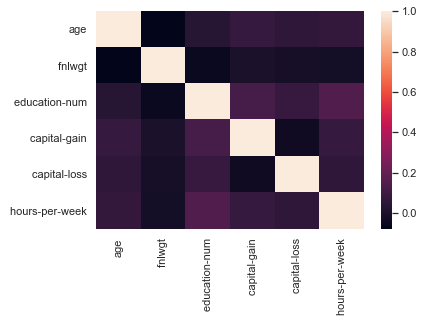

In [13]:
sns.heatmap(data_corr)

In [14]:
#KNN Classification

In [15]:
from sklearn.model_selection import train_test_split
X= df.drop([' income'], axis=1)
y= df[' income']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
num_atr=['age' , ' fnlwgt' , ' education-num' , ' capital-gain' , ' capital-loss' , ' hours-per-week']

cat_atr=[' workclass' , ' education' , ' marital-status' , ' occupation' , ' relationship' , ' race' , ' sex' , ' native-country']

In [19]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
X_train[cat_atr].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
16525,5,10,2,10,0,4,1,38
14551,4,9,4,4,1,4,0,38
518,0,15,4,0,4,4,0,38
22524,4,15,2,1,0,4,1,38
11425,4,2,4,6,3,4,1,38


In [21]:
X_train[num_atr].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
16525,44,64632,16,0,0,60
14551,22,211361,13,0,0,30
518,21,204226,10,0,0,35
22524,46,330416,10,0,0,40
11425,17,226717,8,0,0,20


In [22]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[ 0.39574269, -1.18011138,  2.29318429, -0.14783716, -0.21768425,
         1.57918014],
       [-1.21466862,  0.20188912,  1.12830357, -0.14783716, -0.21768425,
        -0.84195487],
       [-1.28786913,  0.1346865 , -0.03657715, -0.14783716, -0.21768425,
        -0.43843237],
       ...,
       [-0.84866605, -0.80501055,  1.12830357, -0.14783716, -0.21768425,
        -0.03490987],
       [ 1.49375039,  0.74194955, -0.42487072, -0.14783716, -0.21768425,
        -0.03490987],
       [-0.40946296, -1.2323759 ,  1.12830357, -0.14783716,  4.49422474,
         0.36861264]])

In [23]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(22792, 14)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [25]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(9769, 14)

In [26]:
y_pred = knn.predict(Xtr1)

In [27]:
confusion_matrix(y_test, y_pred)

array([[6777,  773],
       [ 916, 1303]])

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test, y_pred)

0.8271061521138294

In [30]:
from sklearn.metrics import precision_recall_fscore_support

In [31]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.88093072, 0.62764933]),
 array([0.89761589, 0.58720144]),
 array([0.88919504, 0.60675204]),
 array([7550, 2219]))

In [32]:
from sklearn.metrics import precision_score

In [33]:
precision_score(y_test, y_pred,pos_label= ' <=50K' )

0.8809307162355388

In [34]:
from sklearn.metrics import recall_score

In [35]:
recall_score(y_test, y_pred, pos_label= ' <=50K')

0.8976158940397351

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_test, y_pred, pos_label= ' <=50K')

0.8891950403463885

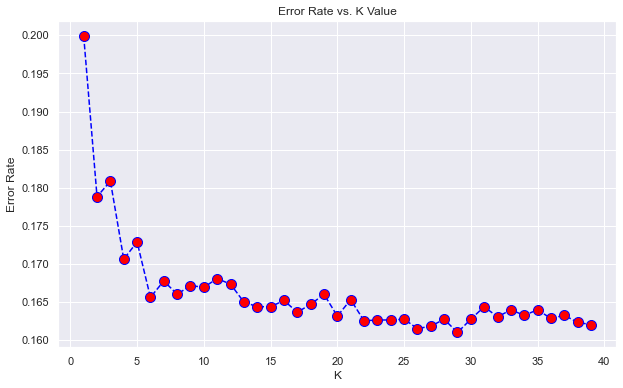

Minimum error:- 0.16101955164295223 at K = 29


In [38]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [39]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [40]:
y_pred = knn.predict(Xtr1)

In [41]:
accuracy_score(y_test, y_pred)

0.8328385709898659

In [42]:
# Decision Tree Algorithm

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [45]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [46]:
X= df.drop([' income'], axis=1)
y= df[' income']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [47]:
y.shape

(32561,)

In [48]:
X.shape

(32561, 14)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [51]:
X_train[cat_atr].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
16525,5,10,2,10,0,4,1,38
14551,4,9,4,4,1,4,0,38
518,0,15,4,0,4,4,0,38
22524,4,15,2,1,0,4,1,38
11425,4,2,4,6,3,4,1,38


In [52]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[ 0.39574269, -1.18011138,  2.29318429, -0.14783716, -0.21768425,
         1.57918014],
       [-1.21466862,  0.20188912,  1.12830357, -0.14783716, -0.21768425,
        -0.84195487],
       [-1.28786913,  0.1346865 , -0.03657715, -0.14783716, -0.21768425,
        -0.43843237],
       ...,
       [-0.84866605, -0.80501055,  1.12830357, -0.14783716, -0.21768425,
        -0.03490987],
       [ 1.49375039,  0.74194955, -0.42487072, -0.14783716, -0.21768425,
        -0.03490987],
       [-0.40946296, -1.2323759 ,  1.12830357, -0.14783716,  4.49422474,
         0.36861264]])

In [53]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(22792, 14)

In [54]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[ 1.72510765, -1.56152668, -2.35731113, -0.14169683, -0.21425901,
         2.08669208],
       [-1.5122493 ,  0.17937669, -1.18822937, -0.14169683, -0.21425901,
        -1.26166752],
       [-0.99721524, -0.83549373,  1.14993414,  3.52600278, -0.21425901,
         0.78001516],
       ...,
       [-0.11429971, -0.11086355, -0.01914762,  0.51901102, -0.21425901,
        -0.03665791],
       [-1.14436783, -0.62885321,  0.3705463 , -0.14169683, -0.21425901,
        -0.03665791],
       [ 0.40073435,  1.71326482, -3.13669897, -0.14169683, -0.21425901,
        -0.03665791]])

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(9769, 14)

In [55]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [56]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [57]:
y_pred = dt.predict(Xtr1)

In [58]:
np.sum((y_test == y_pred))/y_test.size

0.7992629747159382

In [59]:
# Accuracy is 80.06%

In [60]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

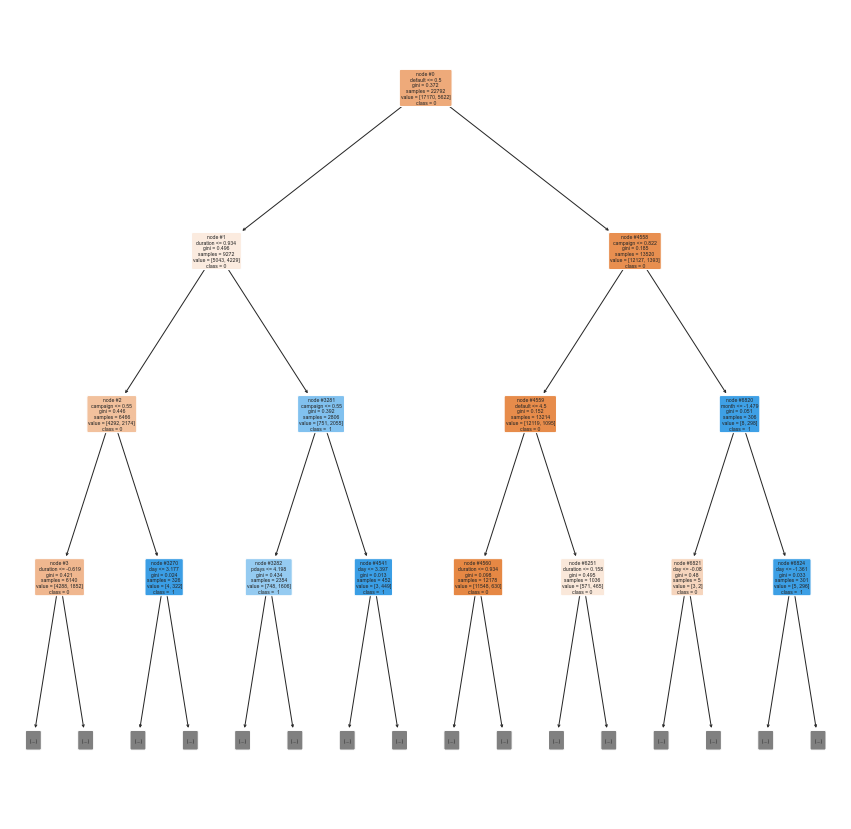

In [61]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
            class_names = ['0',' 1']
            )

_=plt.show()

In [62]:
# Random Forest Classification Algorithm

In [63]:
from sklearn.model_selection import train_test_split
X= df.drop([' income'], axis=1)
y= df[' income']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [67]:
X_train[cat_atr].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
16525,5,10,2,10,0,4,1,38
14551,4,9,4,4,1,4,0,38
518,0,15,4,0,4,4,0,38
22524,4,15,2,1,0,4,1,38
11425,4,2,4,6,3,4,1,38


In [68]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[ 0.39574269, -1.18011138,  2.29318429, -0.14783716, -0.21768425,
         1.57918014],
       [-1.21466862,  0.20188912,  1.12830357, -0.14783716, -0.21768425,
        -0.84195487],
       [-1.28786913,  0.1346865 , -0.03657715, -0.14783716, -0.21768425,
        -0.43843237],
       ...,
       [-0.84866605, -0.80501055,  1.12830357, -0.14783716, -0.21768425,
        -0.03490987],
       [ 1.49375039,  0.74194955, -0.42487072, -0.14783716, -0.21768425,
        -0.03490987],
       [-0.40946296, -1.2323759 ,  1.12830357, -0.14783716,  4.49422474,
         0.36861264]])

In [69]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(22792, 14)

In [70]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[ 1.72510765, -1.56152668, -2.35731113, -0.14169683, -0.21425901,
         2.08669208],
       [-1.5122493 ,  0.17937669, -1.18822937, -0.14169683, -0.21425901,
        -1.26166752],
       [-0.99721524, -0.83549373,  1.14993414,  3.52600278, -0.21425901,
         0.78001516],
       ...,
       [-0.11429971, -0.11086355, -0.01914762,  0.51901102, -0.21425901,
        -0.03665791],
       [-1.14436783, -0.62885321,  0.3705463 , -0.14169683, -0.21425901,
        -0.03665791],
       [ 0.40073435,  1.71326482, -3.13669897, -0.14169683, -0.21425901,
        -0.03665791]])

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(9769, 14)

In [71]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [72]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8579179035725253


In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[7056,  494],
       [ 894, 1325]])

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7550
        >50K       0.73      0.60      0.66      2219

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.86      0.85      9769



In [75]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [77]:
df.feature_names = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]
df.target_names = df[' income']

<ipython-input-77-44b548dc6b76>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',
<ipython-input-77-44b548dc6b76>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target_names = df[' income']


In [78]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

2     0.165575
0     0.146503
10    0.112665
7     0.112447
4     0.090827
12    0.083501
6     0.067700
5     0.064434
1     0.040777
3     0.036326
11    0.034976
13    0.017296
8     0.014311
9     0.012662
dtype: float64

In [79]:
list(zip(df.columns, feature_imp))

[('age', 0.16557450938057727),
 (' workclass', 0.1465031467405116),
 (' fnlwgt', 0.11266516493380799),
 (' education', 0.11244683326465685),
 (' education-num', 0.09082748982078376),
 (' marital-status', 0.08350095592453645),
 (' occupation', 0.0676997232307114),
 (' relationship', 0.06443429593912958),
 (' race', 0.04077678534276005),
 (' sex', 0.03632576770688608),
 (' capital-gain', 0.03497639917674569),
 (' capital-loss', 0.017295904445565707),
 (' hours-per-week', 0.01431069986535665),
 (' native-country', 0.0126623242279711)]

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


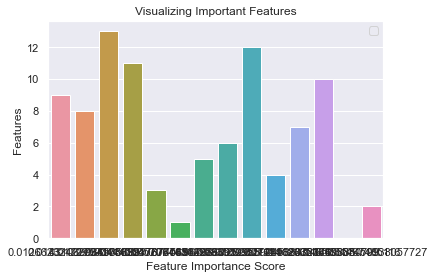

In [80]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.8574060804585935


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7550
        >50K       0.72      0.60      0.66      2219

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.86      0.85      9769

